<a href="https://colab.research.google.com/github/evakorsunova/evakorsunova-DataScience-GenAI-Final-Submissions/blob/main/evakorsunova/evakorsunova-DataScience-GenAI-Final-Submissions/Personal/Finance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project

In this data project I will focus on exploratory data analysis of stock prices.

In [ ]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

## Data

I will get stock information for the following banks from Jan 1st 2006 to Jan 1st 2016:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [ ]:
import yfinance as yf
bac = yf.download("BAC", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-2840008431.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bac = yf.download("BAC", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
c = yf.download("C", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-4186177185.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  c = yf.download("C", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
gs = yf.download("GS", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-4206123220.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gs = yf.download("GS", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
jpm =  yf.download("JPM", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-2851143159.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  jpm =  yf.download("JPM", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
ms = yf.download("MS", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-336095302.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ms = yf.download("MS", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
wfc = yf.download("WFC", start="2006-01-01", end="2016-01-01")

/tmp/ipython-input-1832777192.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  wfc = yf.download("WFC", start="2006-01-01", end="2016-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], axis=1, keys = tickers)

In [ ]:
bank_stocks.columns = bank_stocks.columns.droplevel(2)

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [ ]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.660288  30.725411  30.054636  30.556087  16296700  317.449677   
2006-01-04   30.334669  30.764486  30.250007  30.608188  17757900  311.588776   
2006-01-05   30.373749  30.497486  30.165353  30.334676  14970700  313.134613   
2006-01-06   30.328161  30.549582  30.184888  30.477946  12599800  313.134613   
2006-01-09   30.347694  30.588654  30.191399  30.425845  15619400  311.653259   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   318.029313  309.849956  315.581951  1537600  ...  31.522432   
2006-01-04   316.225905  311.395570  314.680202  1870960  ...  31.544058   
2006-01-05   314.165069  311.717707  311.975321  1143160  ...  31.630573   
2006-01-06   314.937931  310.429617  314.809114  1370210  ...  31.662998   
2006-01-09   313.907416  311.073623  313.005757  1680740  ...  31.998175   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   31.619741  30.673689  30.906146  5377000  18.469479  18.512903   
2006-01-04   32.046817  31.544058  31.733269  7977800  18.255251  18.423155   
2006-01-05   31.673822  31.365680  31.652198  5778000  18.234983  18.269722   
2006-01-06   31.814366  31.381885  31.771119  6889800  18.342094  18.397097   
2006-01-09   32.052236  31.690032  31.695439  4144500  18.339212  18.426060   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.061297  18.295785  11016400  
2006-01-04   18.159719  18.411575  10870000  
2006-01-05   18.127871  18.237878  10158000  
2006-01-06   18.171295  18.284196   8403800  
2006-01-09   18.269735  18.339212   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

In [ ]:
bank_stocks.xs('Close', axis=1, level=1).max()

,0
Bank Ticker,
BAC,37.078724
C,378.467682
GS,183.258820
JPM,53.088631
MS,49.414917
WFC,43.540512


** I will create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns = pd.DataFrame()

In [ ]:
for ticker in tickers:
    returns[ticker + ' Returns'] = bank_stocks[ticker]['Close'].pct_change()

In [ ]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007045,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010586,-0.000157


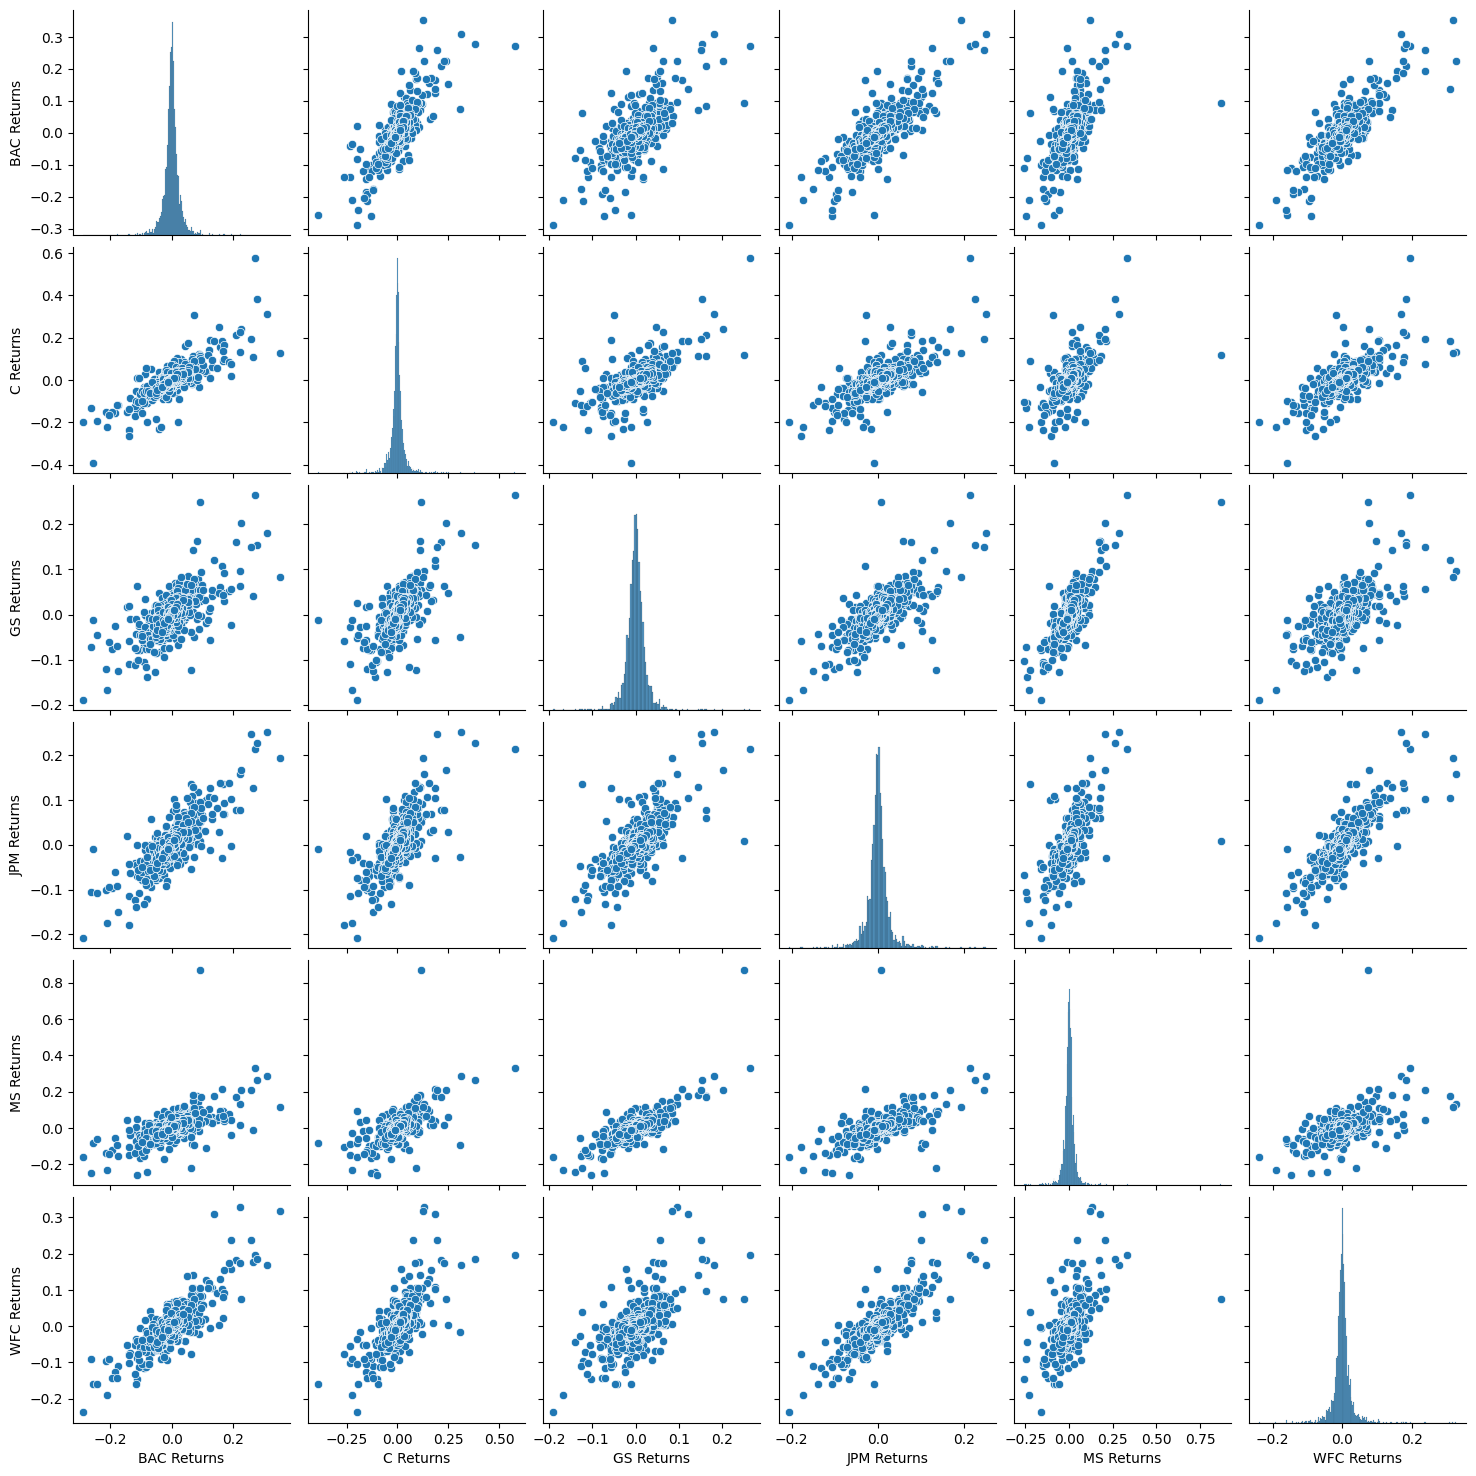

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns)
plt.show()

In [ ]:
returns.idxmin()

,0
BAC Returns,2009-01-20
C Returns,2009-02-27
GS Returns,2009-01-20
JPM Returns,2009-01-20
MS Returns,2008-10-09
WFC Returns,2009-01-20


In [ ]:
returns.idxmax()

,0
BAC Returns,2009-04-09
C Returns,2008-11-24
GS Returns,2008-11-24
JPM Returns,2009-01-21
MS Returns,2008-10-13
WFC Returns,2008-07-16


In [ ]:
returns.std()

,0
BAC Returns,0.036659
C Returns,0.038672
GS Returns,0.025386
JPM Returns,0.027675
MS Returns,0.037717
WFC Returns,0.030195


In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

,0
BAC Returns,0.016174
C Returns,0.015288
GS Returns,0.014043
JPM Returns,0.014006
MS Returns,0.016287
WFC Returns,0.012552


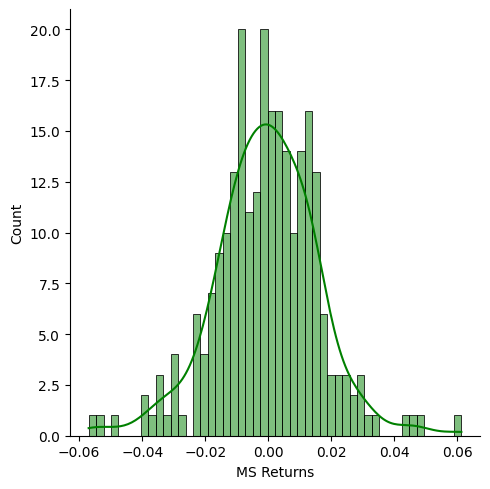

In [ ]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], kde = True, bins = 50, color = 'green')
plt.style.use('ggplot')
plt.show()

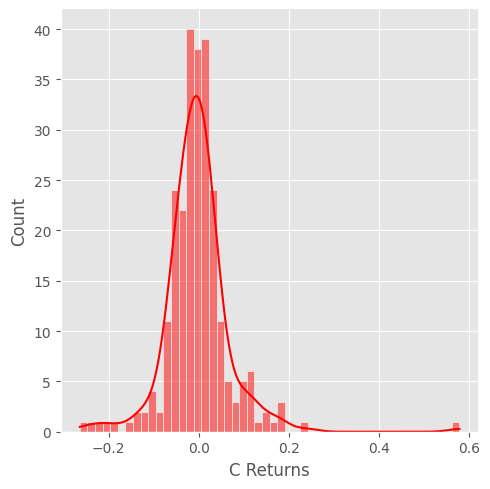

In [ ]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], kde = True, color = 'red', bins = 50)
plt.style.use('ggplot')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

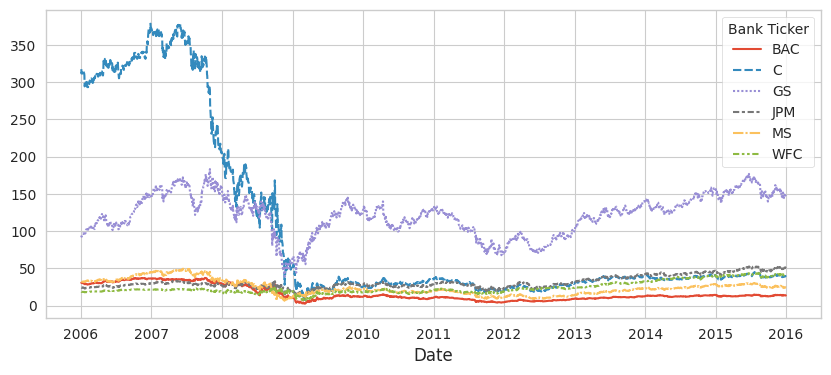

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(bank_stocks.xs('Close', axis=1, level=1))
plt.show()

In [ ]:
bank_stocks.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

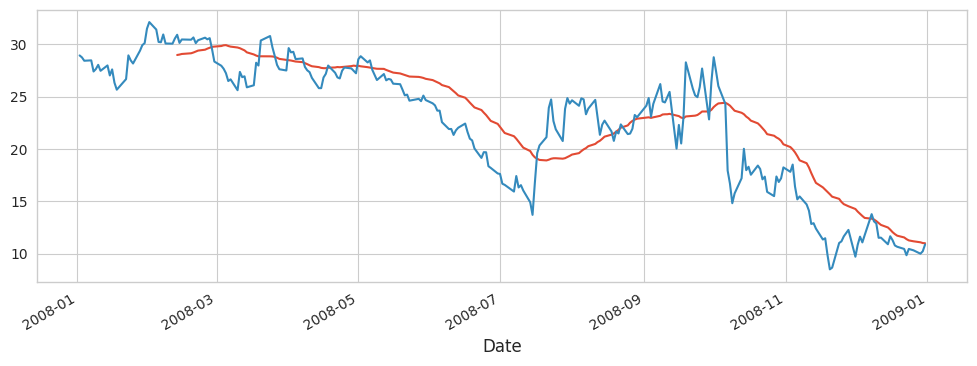

In [ ]:
plt.figure(figsize=(12, 4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot()
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot()
plt.show()

In [ ]:
cl = bank_stocks.xs('Close', axis = 1, level=1).corr()

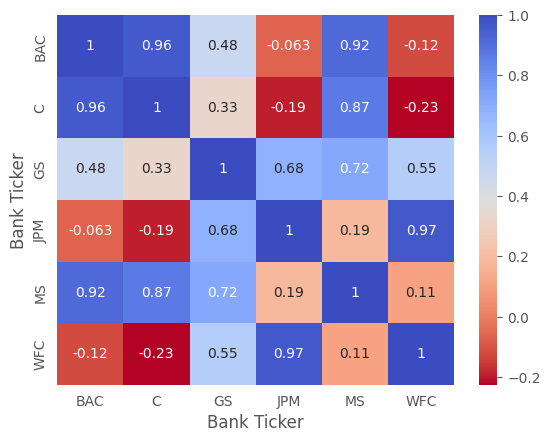

In [ ]:
plt.style.use('ggplot')
sns.heatmap(cl, cmap = 'coolwarm_r', annot=True)
plt.show()

<Figure size 600x600 with 0 Axes>

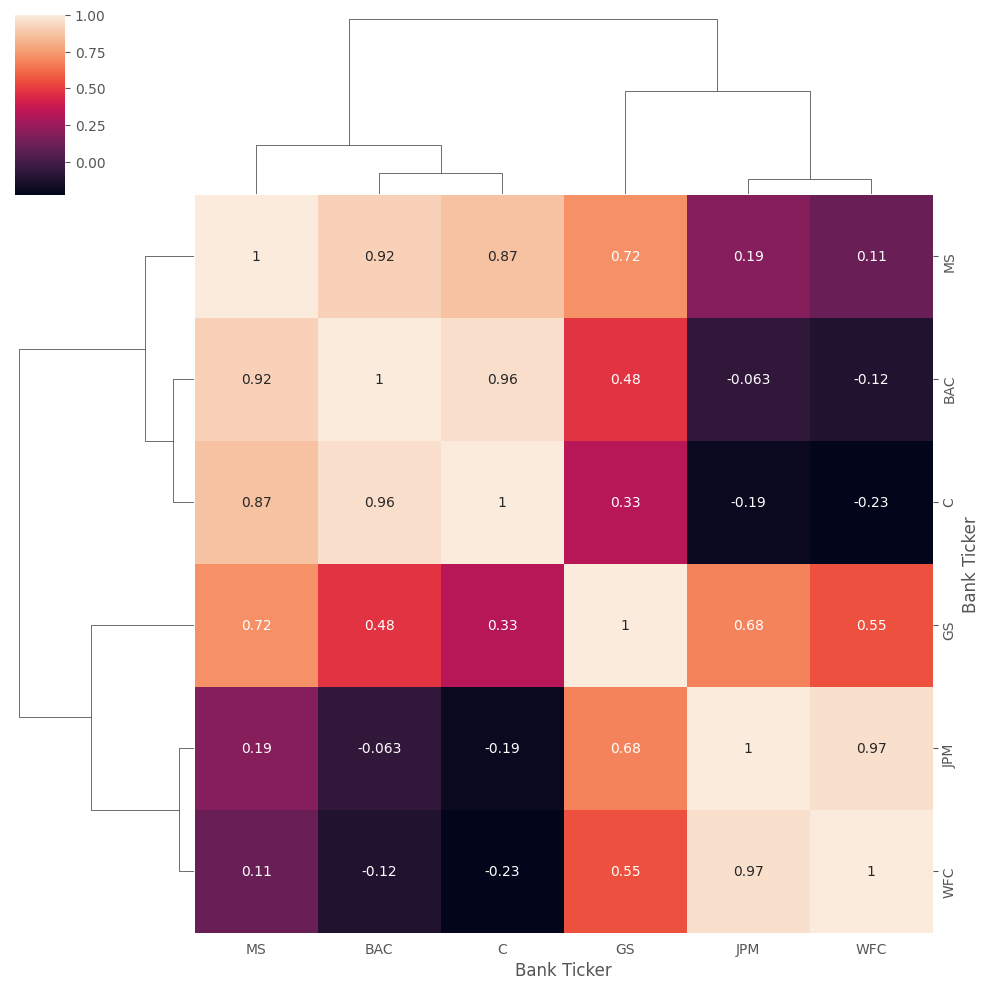

In [ ]:
plt.figure(figsize=(6, 6))
sns.clustermap(cl, annot=True)
plt.show()